IMPORT LIBRERIE E DATASET POLLUTANT RELEASE


In [4]:
#import dataset e librerie 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from plot_silhouette import plot_silhouette
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
from matplotlib import pyplot as plt

df = pd.read_csv('Pollutant_Release_new.csv' ,sep =';',encoding='latin-1')


df.head()

,FacilityID,NationalID,FacilityName,StreetName,BuildingNumber,PostalCode,City,CountryName,Lat,Long,...,MainIAActivityCode,MainIASectorName,MainIAActivityName,MainIASubActivityName,MainActivityIndicator,ReportingYear,PollutantName,PollutantGroupName,TotalQuantity,ReleaseMediumName
0,192129,1124.0040.02,Sele avfallsplass - Deponi,Kleppvegen 837,NaN,4354,Voll,Norway,"58,8203773","5,578351",...,5.(d),Waste and waste water management,Landfills (see note in Guidance Document),NaN,True,2015,Total nitrogen,Inorganic substances,53300,Water
1,192129,1124.0040.02,Sele avfallsplass - Deponi,Kleppvegen 837,NaN,4354,Voll,Norway,"58,8203773","5,578351",...,5.(d),Waste and waste water management,Landfills (see note in Guidance Document),NaN,True,2015,Di-(2-ethyl hexyl) phthalate (DEHP),Other organic substances,"3,09",Water
2,192129,1124.0040.02,Sele avfallsplass - Deponi,Kleppvegen 837,NaN,4354,Voll,Norway,"58,8203773","5,578351",...,5.(d),Waste and waste water management,Landfills (see note in Guidance Document),NaN,True,2015,"1,1,1-trichloroethane",Chlorinated organic substances,"0,0482",Water
3,4659,06K000239,"ArcelorMittal Poland S.A., Oddzia? w Krakowie",Ujastek 1,NaN,30-969,Kraków,Poland,"50,080333","20,092361",...,2.(a),Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,NaN,False,2013,Hydro-fluorocarbons (HFCs),Greenhouse gases,190,Air
4,4659,06K000239,"ArcelorMittal Poland S.A., Oddzia? w Krakowie",Ujastek 1,NaN,30-969,Kraków,Poland,"50,080333","20,092361",...,2.(a),Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,NaN,False,2013,Methane (CH4),Greenhouse gases,536000,Air


In [5]:
df.tail()

,FacilityID,NationalID,FacilityName,StreetName,BuildingNumber,PostalCode,City,CountryName,Lat,Long,...,MainIAActivityCode,MainIASectorName,MainIAActivityName,MainIASubActivityName,MainActivityIndicator,ReportingYear,PollutantName,PollutantGroupName,TotalQuantity,ReleaseMediumName
652346,45039,07-01-114014,Rasselstein GmbH,Koblenzer Str.,141,56626,Andernach,Germany,"50,43481013","7,426398842",...,2.(f),Productiona and processing of metals,Installations for surface treatment of metals ...,NaN,False,2009,Nickel and compounds (as Ni),Heavy metals,131,Water
652347,45039,07-01-114014,Rasselstein GmbH,Koblenzer Str.,141,56626,Andernach,Germany,"50,43481013","7,426398842",...,2.(f),Productiona and processing of metals,Installations for surface treatment of metals ...,NaN,False,2009,Total organic carbon (TOC) (as total C or COD/3),Other organic substances,80700,Water
652348,45039,07-01-114014,Rasselstein GmbH,Koblenzer Str.,141,56626,Andernach,Germany,"50,43481013","7,426398842",...,2.(f),Productiona and processing of metals,Installations for surface treatment of metals ...,NaN,False,2009,Zinc and compounds (as Zn),Heavy metals,184,Water
652349,45706,06-09-162-0025-0001,BMW Werk 1.1,Lerchenauer Str.,76,80788,München,Germany,"48,17917516","11,56150203",...,9.(c),Other activities,Installations for the surface treatment of sub...,NaN,True,2009,Non-methane volatile organic compounds (NMVOC),Other gases,374000,Air
652350,46133,06-09-775-2109-0001,EvoBus GmbH,Carl-Zeiss-Str.,2,89231,Neu-Ulm,Germany,"48,39309564","10,03985627",...,9.(c),Other activities,Installations for the surface treatment of sub...,NaN,True,2009,Non-methane volatile organic compounds (NMVOC),Other gases,288000,Air


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652351 entries, 0 to 652350
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   FacilityID              652351 non-null  int64 
 1   NationalID              652351 non-null  object
 2   FacilityName            651263 non-null  object
 3   StreetName              645937 non-null  object
 4   BuildingNumber          418206 non-null  object
 5   PostalCode              650638 non-null  object
 6   City                    638945 non-null  object
 7   CountryName             652351 non-null  object
 8   Lat                     652351 non-null  object
 9   Long                    652351 non-null  object
 10  CompetentAuthorityName  652351 non-null  object
 11  MainIAActivityCode      652351 non-null  object
 12  MainIASectorName        652351 non-null  object
 13  MainIAActivityName      652351 non-null  object
 14  MainIASubActivityName   133018 non-n

In [7]:
df['ReportingYear'].value_counts()

2008    57306
2007    55647
2010    55482
2011    55398
2012    54979
2009    54421
2013    54163
2014    54125
2015    52509
2017    52085
2016    51753
2004    29200
2001    25283
Name: ReportingYear, dtype: int64

In [8]:
#trasformo quantità di inquinante misurato in kg in float usando una funzione lambda

df['TotalQuantity'] = df['TotalQuantity'].apply(lambda x: float(x.replace(',','.')))



In [9]:
del df['FacilityID']
del df['NationalID']
del df['FacilityName']
del df['StreetName']
del df['BuildingNumber']
del df['City']
del df['PostalCode']
del df['Lat']
del df['Long']

In [10]:
del df['CompetentAuthorityName']
del df['MainIAActivityCode']
del df['MainIASubActivityName']
del df['MainActivityIndicator']
#del df['']
#del df['']


In [11]:
df.head(10)

,CountryName,MainIASectorName,MainIAActivityName,ReportingYear,PollutantName,PollutantGroupName,TotalQuantity,ReleaseMediumName
0,Norway,Waste and waste water management,Landfills (see note in Guidance Document),2015,Total nitrogen,Inorganic substances,5.330000e+04,Water
1,Norway,Waste and waste water management,Landfills (see note in Guidance Document),2015,Di-(2-ethyl hexyl) phthalate (DEHP),Other organic substances,3.090000e+00,Water
2,Norway,Waste and waste water management,Landfills (see note in Guidance Document),2015,"1,1,1-trichloroethane",Chlorinated organic substances,4.820000e-02,Water
3,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Hydro-fluorocarbons (HFCs),Greenhouse gases,1.900000e+02,Air
4,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Methane (CH4),Greenhouse gases,5.360000e+05,Air
5,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Chlorine and inorganic compounds (as HCl),Other gases,5.940000e+04,Air
6,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Non-methane volatile organic compounds (NMVOC),Other gases,1.130000e+05,Air
7,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Sulphur oxides (SOx/SO2),Other gases,1.800000e+06,Air
8,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Carbon monoxide (CO),Other gases,6.790000e+06,Air
9,Poland,Productiona and processing of metals,Metal ore (including sulphide ore) roasting or...,2013,Particulate matter (PM10),Inorganic substances,4.090000e+05,Air


In [12]:
basket = (df
          .groupby(['ReportingYear','CountryName','PollutantGroupName'])['TotalQuantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('CountryName'))

In [13]:
basket

PollutantGroupName,ReportingYear,Chlorinated organic substances,Greenhouse gases,Heavy metals,Inorganic substances,Other gases,Other organic substances,Pesticides
CountryName,,,,,,,,
Austria,2001,8.852000e+04,2.663004e+10,71773.60,1.682717e+08,1.999786e+08,1.061244e+07,0.00
Belgium,2001,1.048286e+06,7.100248e+10,363656.24,7.071798e+08,7.334883e+08,8.637942e+06,0.00
Denmark,2001,3.140000e+03,2.466703e+10,1599.70,3.465000e+05,7.330050e+07,1.802190e+05,0.00
Finland,2001,1.587637e+06,3.813176e+10,142034.93,4.170092e+07,1.618255e+08,8.417478e+07,0.00
France,2001,6.725128e+06,8.241380e+10,1583629.47,2.199154e+09,1.309144e+09,3.102551e+07,153.00
...,...,...,...,...,...,...,...,...
Slovenia,2017,1.621000e+03,1.324803e+10,12653.40,3.531335e+06,6.374440e+07,1.086281e+06,52.00
Spain,2017,8.181461e+05,1.651513e+11,435199.39,9.963100e+08,1.397584e+09,5.278744e+07,6748.84
Sweden,2017,4.719013e+05,6.990331e+10,122682.75,8.569479e+07,1.256801e+08,5.536484e+07,0.00


In [14]:
basket = basket.set_index('ReportingYear', append=True)


In [15]:
basket

,PollutantGroupName,Chlorinated organic substances,Greenhouse gases,Heavy metals,Inorganic substances,Other gases,Other organic substances,Pesticides
CountryName,ReportingYear,,,,,,,
Austria,2001,8.852000e+04,2.663004e+10,71773.60,1.682717e+08,1.999786e+08,1.061244e+07,0.00
Belgium,2001,1.048286e+06,7.100248e+10,363656.24,7.071798e+08,7.334883e+08,8.637942e+06,0.00
Denmark,2001,3.140000e+03,2.466703e+10,1599.70,3.465000e+05,7.330050e+07,1.802190e+05,0.00
Finland,2001,1.587637e+06,3.813176e+10,142034.93,4.170092e+07,1.618255e+08,8.417478e+07,0.00
France,2001,6.725128e+06,8.241380e+10,1583629.47,2.199154e+09,1.309144e+09,3.102551e+07,153.00
...,...,...,...,...,...,...,...,...
Slovenia,2017,1.621000e+03,1.324803e+10,12653.40,3.531335e+06,6.374440e+07,1.086281e+06,52.00
Spain,2017,8.181461e+05,1.651513e+11,435199.39,9.963100e+08,1.397584e+09,5.278744e+07,6748.84
Sweden,2017,4.719013e+05,6.990331e+10,122682.75,8.569479e+07,1.256801e+08,5.536484e+07,0.00


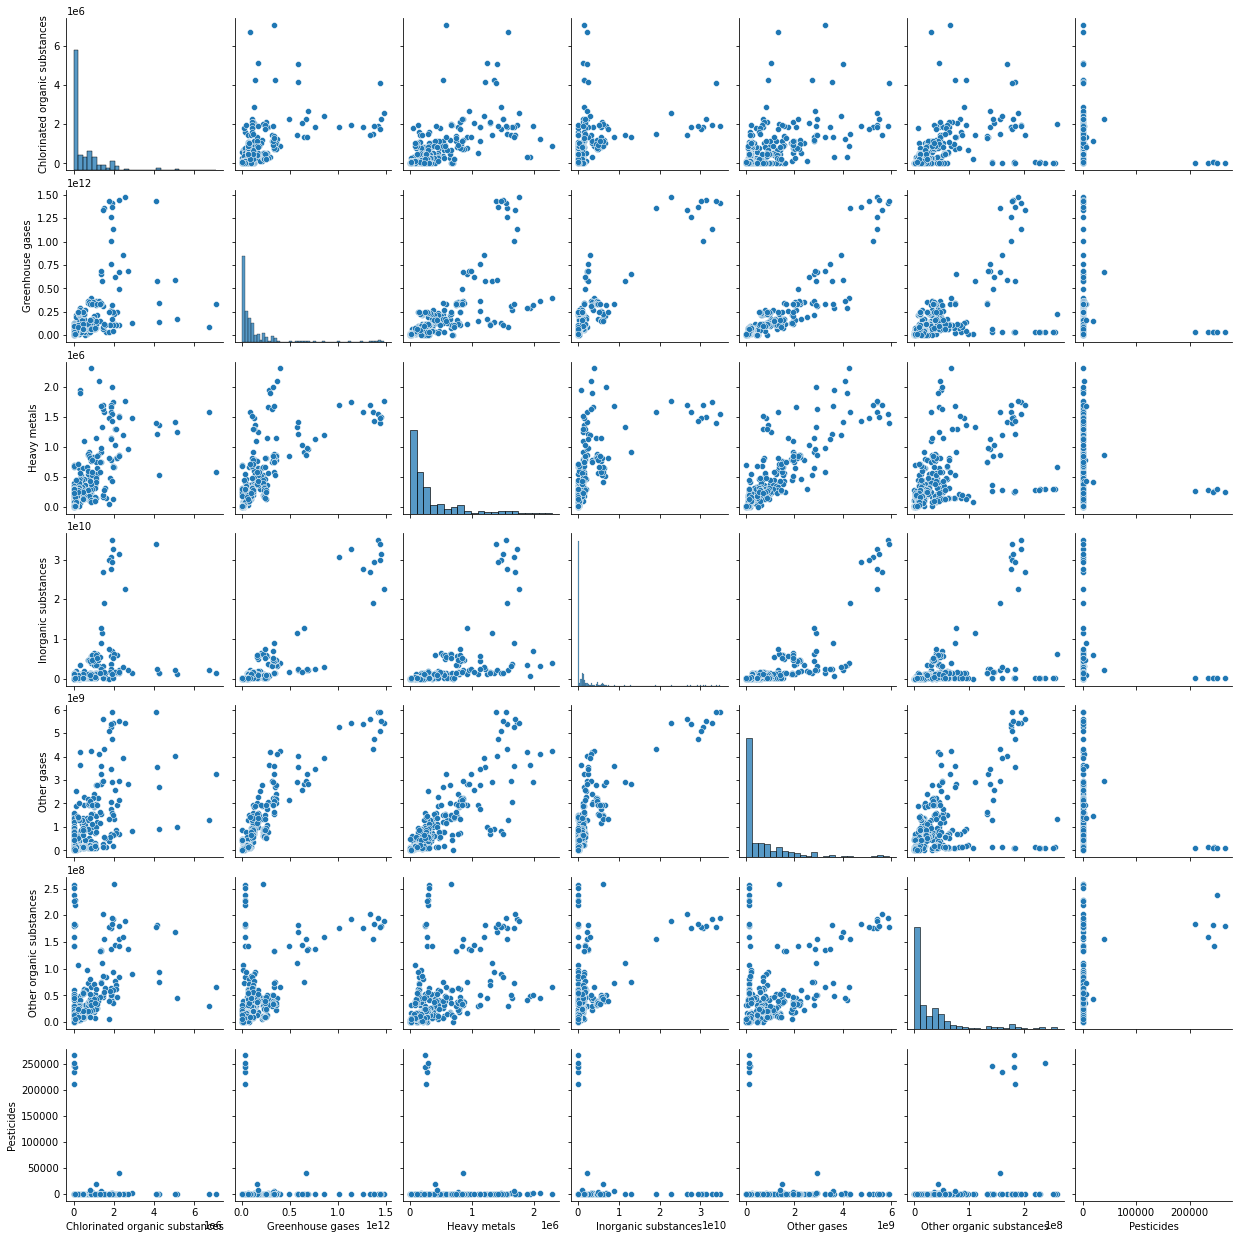

In [16]:
sns.pairplot(pd.DataFrame(basket), dropna = True)

In [17]:
basket_log = np.log10(basket)

In [18]:
basket_log


,PollutantGroupName,Chlorinated organic substances,Greenhouse gases,Heavy metals,Inorganic substances,Other gases,Other organic substances,Pesticides
CountryName,ReportingYear,,,,,,,
Austria,2001,4.947041,10.425372,4.855965,8.226011,8.300983,7.025815,-inf
Belgium,2001,6.020480,10.851274,5.560691,8.849530,8.865393,6.936410,-inf
Denmark,2001,3.496930,10.392117,3.204039,5.539703,7.865107,5.255801,-inf
Finland,2001,6.200751,10.581287,5.152395,7.620146,8.209047,7.925182,-inf
France,2001,6.827701,10.916000,6.199654,9.342256,9.116987,7.491719,2.184691
...,...,...,...,...,...,...,...,...
Slovenia,2017,3.209783,10.122151,4.102207,6.547939,7.804442,6.035942,1.716003
Spain,2017,5.912831,11.217882,5.638688,8.998394,9.145378,7.722531,3.829229
Sweden,2017,5.673851,10.844498,5.088784,7.932954,8.099266,7.743234,-inf


In [19]:
basket_log =  basket_log.replace(-np.inf , 0.000001)

In [20]:
basket_log

,PollutantGroupName,Chlorinated organic substances,Greenhouse gases,Heavy metals,Inorganic substances,Other gases,Other organic substances,Pesticides
CountryName,ReportingYear,,,,,,,
Austria,2001,4.947041,10.425372,4.855965,8.226011,8.300983,7.025815,0.000001
Belgium,2001,6.020480,10.851274,5.560691,8.849530,8.865393,6.936410,0.000001
Denmark,2001,3.496930,10.392117,3.204039,5.539703,7.865107,5.255801,0.000001
Finland,2001,6.200751,10.581287,5.152395,7.620146,8.209047,7.925182,0.000001
France,2001,6.827701,10.916000,6.199654,9.342256,9.116987,7.491719,2.184691
...,...,...,...,...,...,...,...,...
Slovenia,2017,3.209783,10.122151,4.102207,6.547939,7.804442,6.035942,1.716003
Spain,2017,5.912831,11.217882,5.638688,8.998394,9.145378,7.722531,3.829229
Sweden,2017,5.673851,10.844498,5.088784,7.932954,8.099266,7.743234,0.000001


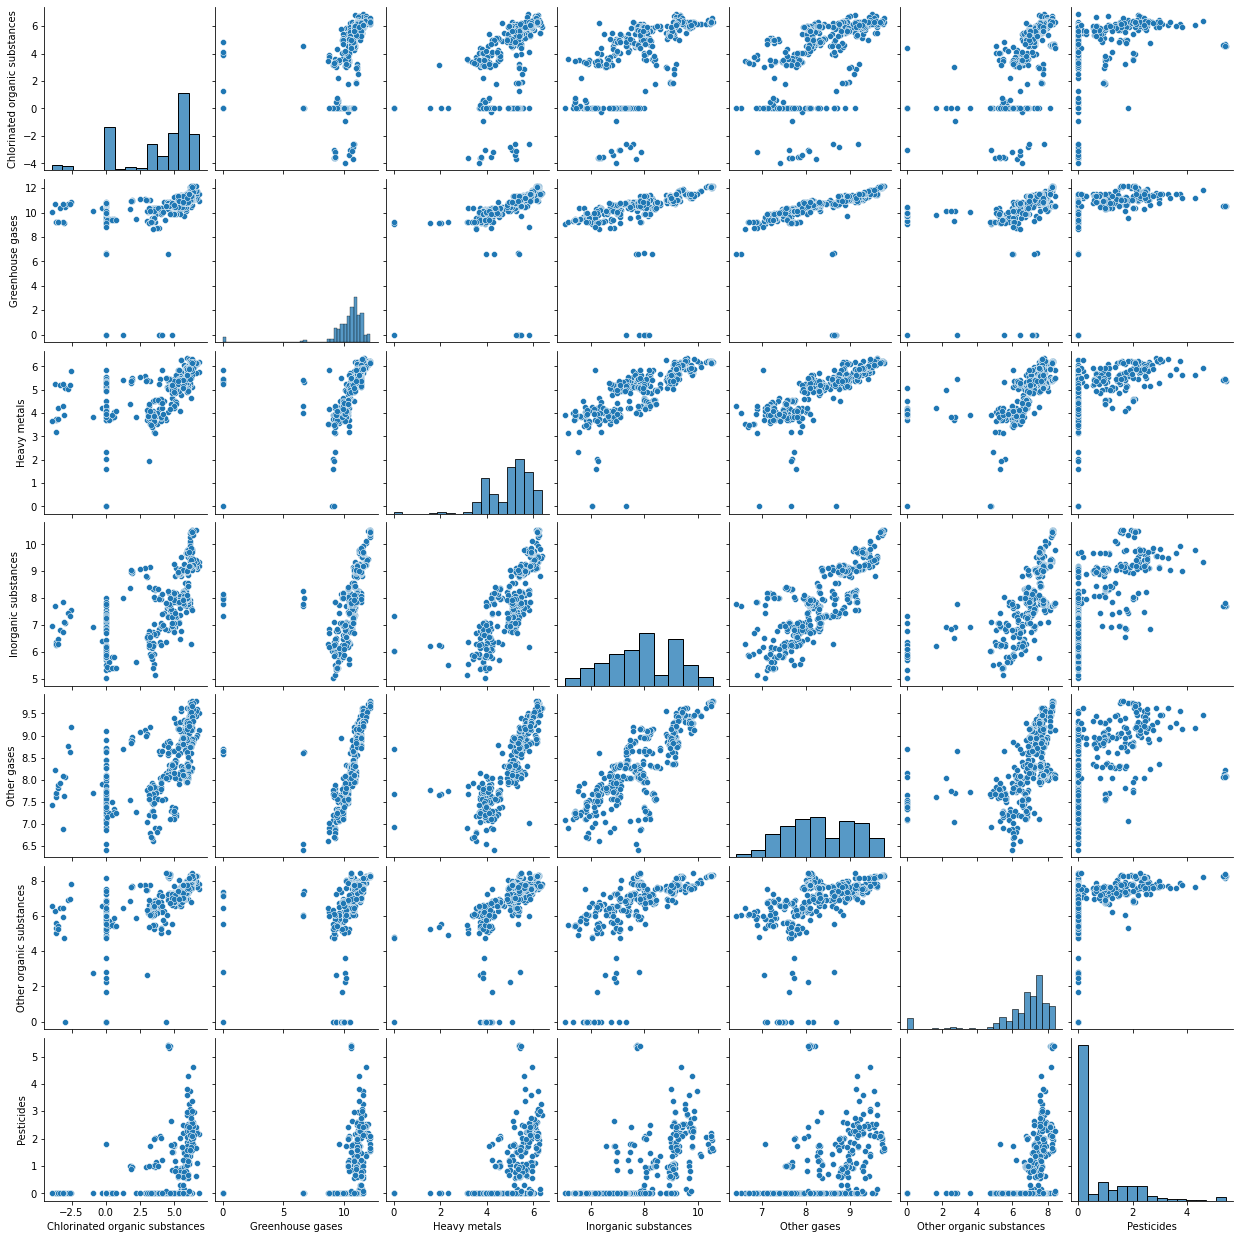

In [21]:
sns.pairplot(pd.DataFrame(basket_log), dropna = True)

In [22]:
#basket_new = basket_new.drop(basket_new.index[[55,54,56,66,67,68]]

from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split

#X_train ,X_test = train_test_split(basket_log,test_size = 0.2,random_state = 0)

scaler = MinMaxScaler([-1,1])
scaler.fit(basket_log)

basket_scaled = scaler.transform(basket_log)

In [23]:
basket_scaled = pd.DataFrame(basket_scaled)

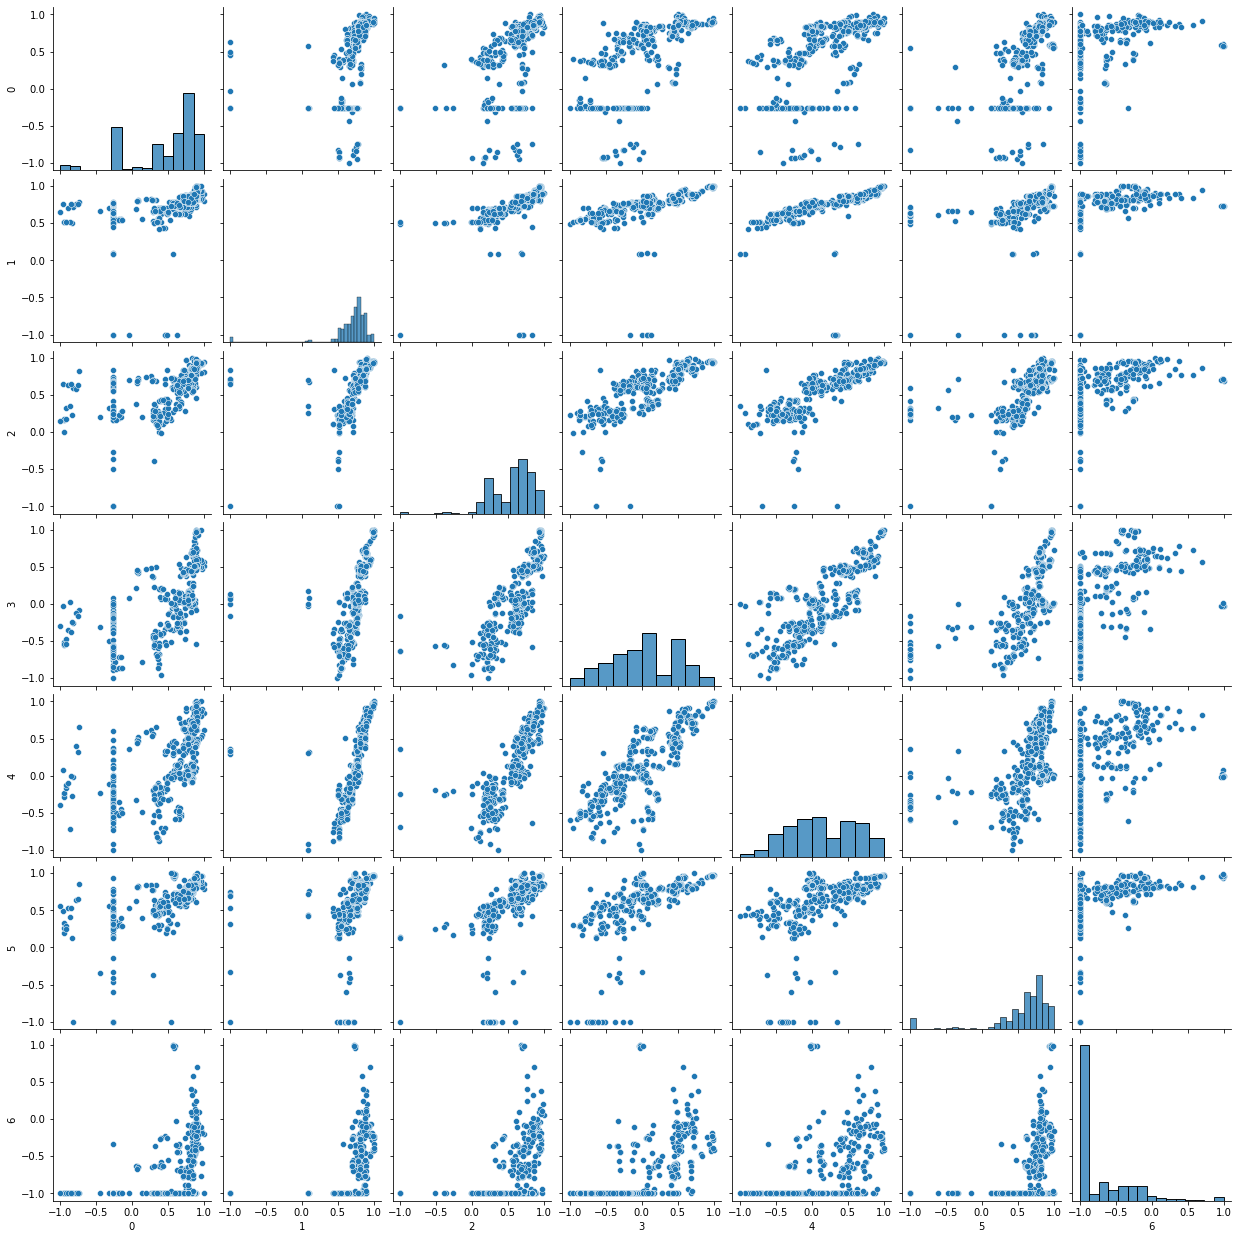

In [24]:
sns.pairplot(pd.DataFrame(basket_scaled))

# Applico l'algoritmo di clustering KMEANS++


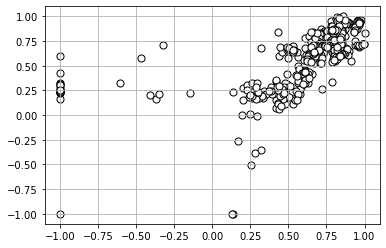

In [25]:
 focus = [0,1,2,3,4,5,6]


arr = np.array(basket_scaled)

plt.scatter(arr[:,focus[5]], arr[:,focus[2]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

In [26]:
k_range = range(2,10)
rnd_state = 42

distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(basket_scaled)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(basket_scaled,y_km))

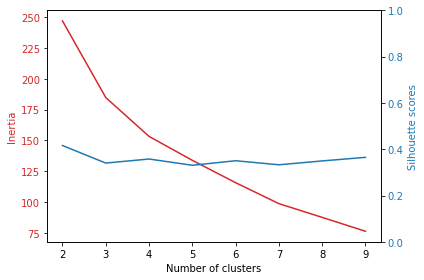

In [27]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [28]:
good_k = 3
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(basket_scaled)

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map 
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive', 
#                             'green', 'cyan', 'blue', 
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10) # by default the last of the map (to be improved)
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]], 
                    X[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], 
                points[:,dim[1]], 
                s=50, 
                marker='*', 
                c=[points_color], 
                label=points_name)
    plt.legend()
    plt.grid()
    plt.show()   

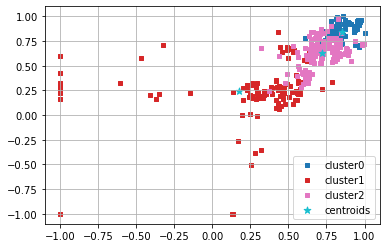

In [30]:
plot_clusters(arr,y_km,dim=(focus[5],focus[2]), points = km.cluster_centers_)

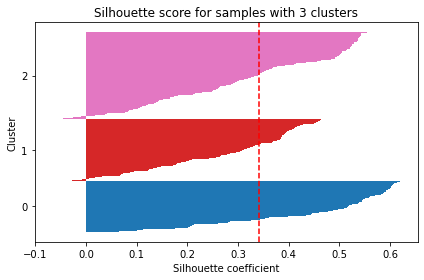

In [31]:
# from plot_silhouette import plot_silhouette
from plot_silhouette import plot_silhouette

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(basket_scaled, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

In [32]:
basket_log['target'] = km.labels_
basket_scaled['target'] = km.labels_

In [33]:
basket_log['cluster'] = km.labels_
basket_log.to_csv('inquinamento.csv')
basket_log['cluster']

CountryName     ReportingYear
Austria         2001             2
Belgium         2001             2
Denmark         2001             1
Finland         2001             2
France          2001             0
                                ..
Slovenia        2017             1
Spain           2017             0
Sweden          2017             2
Switzerland     2017             2
United Kingdom  2017             0
Name: cluster, Length: 386, dtype: int32

# DB SCAN 

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

db = DBSCAN()
y_db = db.fit_predict(arr)
print(db)

DBSCAN()


In [35]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is noise
There is/are 1 cluster(s)


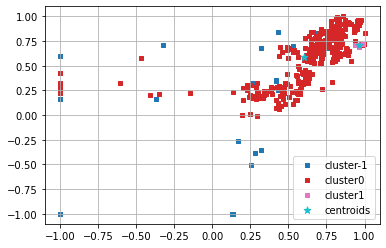

In [36]:
cluster_centers = np.empty((n_clusters,arr.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(arr[y_db==i,:], axis = 0)
plot_clusters(arr,y_db,dim=(focus[5],focus[2]), points = cluster_centers)

In [37]:
param_grid = {'eps': list(np.arange(0.1, 0.4, 0.01)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold

In [38]:
print("{:11}\t{:11}\t{:11}\t{:11}\t{:11}".\
      format('        eps','min_samples',' n_clusters',' silhouette', '    unclust%'))
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(arr)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters > 1:
        X_cl = arr[y_db!=-1,:]
        y_db_cl = y_db[y_db!=-1]
        silhouette = silhouette_score(X_cl,y_db_cl)
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100
        if silhouette > sil_thr and uncl_p < unc_thr:
            print("{:11.2f}\t{:11}\t{:11}\t{:11.2f}\t{:11.2f}%"\
                  .format(db.eps, db.min_samples, n_clusters, silhouette, uncl_p))

        eps	min_samples	 n_clusters	 silhouette	    unclust%
       0.10	          1	        226	       0.26	       0.00%
       0.11	          1	        210	       0.29	       0.00%
       0.12	          1	        188	       0.32	       0.00%
       0.13	          1	        172	       0.30	       0.00%
       0.14	          1	        156	       0.30	       0.00%
       0.15	          1	        145	       0.29	       0.00%
       0.16	          1	        138	       0.30	       0.00%
       0.17	          1	        128	       0.30	       0.00%
       0.18	          1	        119	       0.24	       0.00%
       0.19	          1	        108	       0.23	       0.00%
       0.20	          1	        102	       0.24	       0.00%
       0.21	          1	         96	       0.20	       0.00%
       0.22	          1	         88	       0.22	       0.00%
       0.23	          1	         83	       0.21	       0.00%
       0.24	          1	         78	       0.16	       0.00%
       0.25	          1	

In [39]:
#db = DBSCAN(eps=0.9, min_samples=4)
#db = DBSCAN(eps=0.28, min_samples=9)
#db = DBSCAN(eps=0.1, min_samples=9)
#db = DBSCAN(eps=0.05, min_samples=9)
#db = DBSCAN(eps=0.16, min_samples=9)
db= DBSCAN(eps=0.40, min_samples = 4)
y_db = db.fit_predict(arr)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [40]:
print("There are {} clusters".format(n_clusters))

There are 7 clusters


In [41]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [0 1 2 3 4 5 6]


In [42]:
cluster_centers

array([[ 0.48687946,  0.75264177,  0.58470939,  0.05408516,  0.16975991,
         0.60289029, -0.74079533],
       [ 0.58209555,  0.73424483,  0.70566919, -0.01992599,  0.0101002 ,
         0.96159552,  0.9847111 ]])

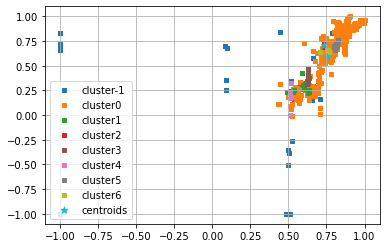

In [43]:
plot_clusters(arr,y_db,dim=(focus[1],focus[2]), points = cluster_centers)

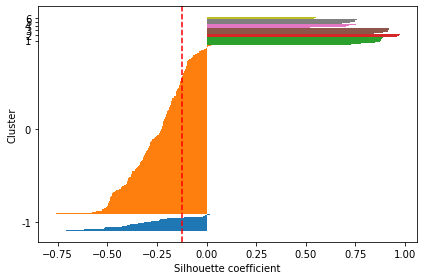

In [44]:
# X_cl = X[y_db!=-1,:]
# y_db_cl = y_db[y_db!=-1]
# silhouette = silhouette_samples(X_cl,y_db_cl)
# plot_silhouette(silhouette,y_db_cl)
silhouette = silhouette_samples(arr,y_db)
plot_silhouette(silhouette,y_db)

# MultiDimentional Scaling

In [45]:
from sklearn.manifold import MDS

In [46]:

basket_scaled

,0,1,2,3,4,5,6,target
0,0.647947,0.713283,0.526513,0.159573,0.123747,0.670120,-1.000000,2
1,0.846582,0.783275,0.748049,0.385754,0.460249,0.648868,-1.000000,2
2,0.379611,0.707818,0.007216,-0.814882,-0.136123,0.249367,-1.000000,1
3,0.879940,0.738906,0.619698,-0.060204,0.068934,0.883911,-1.000000,2
4,0.995954,0.793912,0.948912,0.564490,0.610250,0.780871,-0.194503,0
...,...,...,...,...,...,...,...,...
381,0.326476,0.663452,0.289563,-0.449146,-0.172292,0.434816,-0.367309,1
382,0.826662,0.843522,0.772568,0.439755,0.627177,0.835738,0.411839,0
383,0.782440,0.782161,0.599701,0.053267,0.003483,0.840660,-1.000000,2
384,0.605492,0.624459,0.314137,0.080773,-0.584750,0.596109,-1.000000,2


In [47]:
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(basket_scaled)

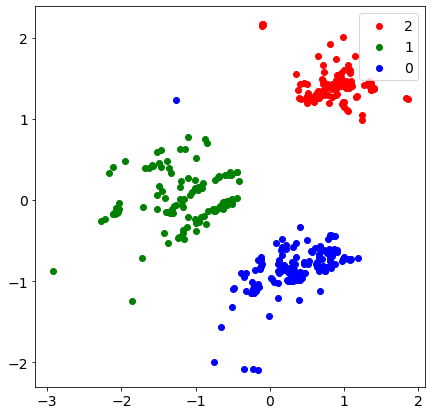

In [48]:
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(basket_scaled.target):
  subset = X_2d[basket_scaled.target == i]
  
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=basket_scaled['target'].unique()[i])
plt.legend()
plt.show()

# PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [50]:
principalComponents = pca.fit_transform(basket_scaled)

In [51]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [52]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.530706,-0.703534
1,-0.221625,-0.993103
2,-0.599564,0.720383
3,-0.499850,-0.821551
4,1.606512,0.144125


In [53]:
basket_scaled[['target']].head()

,target
0,2
1,2
2,1
3,2
4,0


In [54]:
finalDf = pd.concat([principalDf, basket_scaled[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-0.530706,-0.703534,2
1,-0.221625,-0.993103,2
2,-0.599564,0.720383,1
3,-0.499850,-0.821551,2
4,1.606512,0.144125,0


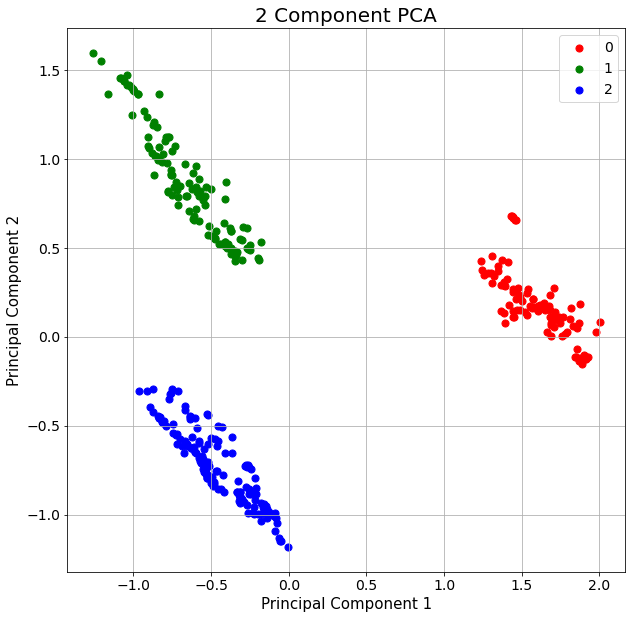

In [55]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

plt.savefig('PCA_inquinanti.png')

In [56]:
pca.explained_variance_ratio_

array([0.50552885, 0.28973306])

Together, the first two principal components contain 80% of the information. The first principal component contains 50.55% of the variance and the second principal component contains 28.97% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

# Caratterizziamo i cluster 

In [57]:
basket_log

,PollutantGroupName,Chlorinated organic substances,Greenhouse gases,Heavy metals,Inorganic substances,Other gases,Other organic substances,Pesticides,target,cluster
CountryName,ReportingYear,,,,,,,,,
Austria,2001,4.947041,10.425372,4.855965,8.226011,8.300983,7.025815,0.000001,2,2
Belgium,2001,6.020480,10.851274,5.560691,8.849530,8.865393,6.936410,0.000001,2,2
Denmark,2001,3.496930,10.392117,3.204039,5.539703,7.865107,5.255801,0.000001,1,1
Finland,2001,6.200751,10.581287,5.152395,7.620146,8.209047,7.925182,0.000001,2,2
France,2001,6.827701,10.916000,6.199654,9.342256,9.116987,7.491719,2.184691,0,0
...,...,...,...,...,...,...,...,...,...,...
Slovenia,2017,3.209783,10.122151,4.102207,6.547939,7.804442,6.035942,1.716003,1,1
Spain,2017,5.912831,11.217882,5.638688,8.998394,9.145378,7.722531,3.829229,0,0
Sweden,2017,5.673851,10.844498,5.088784,7.932954,8.099266,7.743234,0.000001,2,2


In [58]:
global_mean = []
for i in range(len(basket_log.columns)-1):
    x = basket_log.iloc[:,i].mean()
    global_mean.append(x)

In [59]:
global_mean

[3.9117272470612976,
 10.388402950176518,
 4.9709386570861875,
 7.886161398923685,
 8.342298060724252,
 6.658978485835761,
 0.7385993015914183,
 1.1813471502590673]

In [60]:
first_list_df = [[],[],[]]
mean_cluster = [[],[],[]]
for i in range(3):
    first_list_df[i] = basket_log[basket_log['target'] == i]
    first_list_df[i] = first_list_df[i].sort_values(['CountryName','ReportingYear'])
    mean_cluster[i] = first_list_df[i].iloc[:][:].mean()


In [61]:
first_list_df[0]

PollutantGroupName            Chlorinated organic substances  \
CountryName    ReportingYear                                   
Belgium        2007                                 6.008288   
               2009                                 5.956598   
               2010                                 6.066729   
               2011                                 6.053490   
               2012                                 6.056410   
...                                                      ...   
United Kingdom 2013                                 6.272418   
               2014                                 6.310211   
               2015                                 6.353138   
               2016                                 6.139342   
               2017                                 6.110752   

PollutantGroupName            Greenhouse gases  Heavy metals  \
CountryName    ReportingYear                                   
Belgium        2007                  11.111849      5.900710   
               2009                  11.037644      5.581492   
               2010                  11.124881      5.731781   
               2011                  11.112445      5.644277   
               2012                  11.091579      5.679490   
...                                        ...           ...   
United Kingdom 2013                  11.883537      6.054948   
               2014                  11.793796      6.015284   
               2015                  11.693537      5.923271   
               2016                  11.531213      5.870993   
               2017                  11.524101      5.869665   

PollutantGroupName            Inorganic substances  Other gases  \
CountryName    ReportingYear                                      
Belgium        2007                       9.075671     9.269034   
               2009                       8.975074     8.999201   
               2010                       9.135814     9.090320   
               2011                       9.130763     8.998473   
               2012                       9.065495     8.905201   
...                                            ...          ...   
United Kingdom 2013                       9.401590     9.541004   
               2014                       9.248164     9.413740   
               2015                       9.243877     9.334732   
               2016                       9.179236     9.193876   
               2017                       9.179265     9.219261   

PollutantGroupName            Other organic substances  Pesticides  target  \
CountryName    ReportingYear                                                 
Belgium        2007                           7.295387    2.157608       0   
               2009                           7.332564    1.869525       0   
               2010                           7.432708    1.834230       0   
               2011                           7.420503    1.516668       0   
               2012                           7.385345    1.087071       0   
...                                                ...         ...     ...   
United Kingdom 2013                           8.136391    2.114478       0   
               2014                           8.158792    2.454753       0   
               2015                           8.153989    2.457534       0   
               2016                           8.121809    2.134496       0   
               2017                           8.121959    2.416624       0   

PollutantGroupName            cluster  
CountryName    ReportingYear           
Belgium        2007                 0  
               2009                 0  
               2010                 0  
               2011                 0  
               2012                 0  
...                               ...  
United Kingdom 2013                 0  
               2014                 0  
               2015                 0  
       

In [62]:
mean_cluster[0]

PollutantGroupName
Chlorinated organic substances     6.024568
Greenhouse gases                  11.386453
Heavy metals                       5.867055
Inorganic substances               9.376411
Other gases                        9.187396
Other organic substances           7.784424
Pesticides                         2.234439
target                             0.000000
cluster                            0.000000
dtype: float64

In [63]:
def var_perc(xf,xi):
    """
    Calcola la sola variazione percentuale
    xf: valore fine
    ci: valore iniziale
    """
    ris = xf-xi
    ris = ris/xi*100
    return ris

In [64]:
def scostamento(mean_cluster,global_m):
    """
    Calcola la variazione percentuale tra media globale e media di ogni attributo dei cluster e ritorna lo scostamento
    mean_cluster: array contenete le medie di ogni attributo
    global_m: media globale
    
    """
    res_var = []
    for i in range(len(mean_cluster)-1):
        var_perce = var_perc(mean_cluster[i],global_m[i])
        res_var.append(var_perce)
    return res_var   


Caratterizzazione dei cluster : variazione percentuale tra media globale e media nel cluster scelto per ogni attributo

In [65]:
first_scost = [[],[],[]]
for i in range(3):
    first_scost[i] = scostamento(mean_cluster[i],global_mean)
    
first_scost[0]

[54.01299013527054,
 9.607349417559302,
 18.027098701568583,
 18.89701853989282,
 10.130278668005511,
 16.901175655442575,
 202.52387104791288,
 -100.0]

# Cluster 2 :
 * scostamento per rifiuti organici : 24%
 * scostamento per gas serra -1 %
 * scostamento per metallo pesante del 4%
 * scostamento per sostanze inorganiche del 2%
 * scostamento per altri gas del 1%
 * scostamento per altri rifiuti organici : 9%
 
 
 CLUSTER MEDIO
 
 # Cluster 1 :
 * scostamento per rifiuti organici : -79%
 * scostamento per gas serra -7%
 * scostamento per metallo pesante del -20%
 * scostamento per sostanze inorganiche del -18%
 * scostamento per altri gas del -9%
 * scostamento per altri rifiuti organici : -26%%

 
 CLUSTER SCOSTAMENTO BASSO
 
 # Cluster 0 :
 * scostamento per rifiuti organici : 54%
 * scostamento per gas serra 10 %
 * scostamento per metallo pesante del 18%
 * scostamento per sostanze inorganiche del 19%
 * scostamento per altri gas del 10%
 * scostamento per altri rifiuti organici : 17%
 
  
  CLUSTER SCOSTAMENTO ALTO

In [66]:
def scost_country(cluster,global_me):
    """
    La funzione non fa altro che clacolare lo scostamento per ogni attributo e ogni paese di ogni cluster rispetto alla media globale.
    cluster: inserire qui il cluster su cui si vuole calcolare lo scostamento.
    global_me: media globale da utilizzare
    ritorna il nuovo df con tutti gli scostamenti calcolati.
    """
    s0 = pd.Series([str(i) for i in range(len(cluster.index.get_level_values('CountryName').unique()))] ,name='paese')
    s1 = pd.Series(0, name='scost_org_sub')
    s2 = pd.Series(0, name='scost_gas')
    s3 = pd.Series(0, name='scost_h_met')
    s4 = pd.Series(0, name='scost_inorg_sub')
    s5 = pd.Series(0, name='scost_oth_gas')
    s6 = pd.Series(0, name='scost_oth_org_sub')
    s7 = pd.Series(0, name='scost_pest')
    df_cl = pd.concat([s0,s1,s2,s3,s4,s5,s6,s7], axis=1)
    count = 0
    for i in range((len(cluster.index.get_level_values('CountryName').unique()))):      
        a = cluster.xs(cluster.index[count][0],level='CountryName')
        df_cl.iloc[i,0] = cluster.index[count][0]
        count = count + len(cluster.xs(cluster.index[count][0],level='CountryName'))
        df_cl.iloc[i,1] = var_perc(a['Chlorinated organic substances'].mean(),global_me[0])
        df_cl.iloc[i,2] = var_perc(a['Greenhouse gases'].mean(),  global_me[1])
        df_cl.iloc[i,3] = var_perc(a['Heavy metals'].mean(),global_me[2])
        df_cl.iloc[i,4] = var_perc(a['Inorganic substances'].mean(),global_me[3])
        df_cl.iloc[i,5] = var_perc(a['Other gases'].mean(),global_me[4])
        df_cl.iloc[i,6] = var_perc(a['Other organic substances'].mean(),global_me[5])
        df_cl.iloc[i,7] = var_perc(a['Pesticides'].mean(),global_me[6])
    return df_cl
        
    


Ora preso il cluster ho calcolato la media per ogni paese negli anni e l'ho confrontato con la media globale.
Per ogni paese ho la var_perc di ogni anno rispetto alla globale nel rispettivo cluster


In [67]:
df_cl = [[],[],[]]
for i in range(3):
    df_cl[i] = scost_country(first_list_df[i],global_mean) 

In [72]:
df_cl[2]

,paese,scost_org_sub,scost_gas,scost_h_met,scost_inorg_sub,scost_oth_gas,scost_oth_org_sub,scost_pest
0,Austria,24.933979,1.818629,2.218479,-7.383749,-0.432710,8.066079,78.037482
1,Belgium,50.711602,6.267162,13.883887,14.231448,8.232575,8.617597,-84.207871
2,Bulgaria,-116.315293,3.304697,10.762429,-4.988431,7.577330,11.323444,-99.999865
3,Czech Republic,44.434981,8.647408,7.826762,1.434752,7.444082,5.425458,-25.493519
4,Denmark,5.992258,-3.671007,-10.940074,-11.512318,-9.659516,-1.805300,-99.999865
5,Finland,53.813565,4.301567,2.747403,0.223575,-2.733019,15.086979,-99.999865
6,Greece,21.961131,3.987130,2.727782,-6.902884,2.563590,3.350116,-99.999865
7,Hungary,40.381588,0.819796,4.475459,-4.633884,-1.300556,3.972271,-99.999865
8,Ireland,-10.979724,-0.329203,-9.112943,4.409561,-7.580491,1.938409,87.531813
9,Italy,40.767129,10.290381,26.486597,11.834717,14.634915,15.450170,-99.999865


In [84]:
def rank_cl(df):
    """
    La funzione cerca di ricreare la classifica per ogni attributo valutando tutti gli scostamenti
    df: passare il dataframe da classificare
    ritorna il nuovo df classificato.
    """
    new_df= pd.DataFrame(np.random.rand(len(df.iloc[:,0]),len(df.iloc[0,:])),
                     columns=['Rank_'+str(i) for i in range(len(df.iloc[0,:]))])
    for i in range(len(df.iloc[0,:])):
        new_df.iloc[:,i] = df.iloc[:,i].rank()
        
    return new_df

In [85]:
ranked_cl = [[],[],[]]
for i in range(3):
    ranked_cl[i] = rank_cl(df_cl[i])

In [86]:
ranked_cl

[    Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7
 0      1.0     8.0     5.0     6.0     5.0     5.0     3.0     5.0
 1      2.0     5.0     9.0     4.0     2.0     6.0     1.0     2.0
 2      3.0    12.0     4.0    10.0     7.0     4.0    10.0     8.0
 3      4.0    11.0    13.0    13.0    13.0    13.0    12.0     6.0
 4      5.0    10.0    10.0    12.0    12.0    11.0     9.0    12.0
 5      6.0     3.0     8.0     7.0     4.0     3.0     5.0     3.0
 6      7.0     1.0     1.0     2.0     1.0     1.0    13.0    13.0
 7      8.0     6.0    11.0     9.0    11.0     9.0     4.0     1.0
 8      9.0     7.0     2.0     1.0     6.0     2.0     7.0    10.0
 9     10.0     2.0     7.0     3.0     8.0    10.0     8.0     4.0
 10    11.0     4.0     3.0     5.0     3.0     7.0     2.0     7.0
 11    12.0     9.0     6.0     8.0    10.0     8.0     6.0    11.0
 12    13.0    13.0    12.0    11.0     9.0    12.0    11.0     9.0,
     Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Ra

In [87]:
def rank_media(rank_clus):
    """
    La funzione crea la media dei ranking di ogni paese e poi classifica tutti i paesi.
    rank_clus: passare il cluster su cui attuare la funzione.
    """
    r=[]
    for i in range(len(rank_clus.index)):
        x = rank_clus.iloc[i,1:].astype(float).mean() 
        r.append(x)
    
    rank_clus['media_rank_paese'] = r
    rank_clus['media_rank_paese'] = rank_clus['media_rank_paese'].rank()

In [88]:
for i in range(3):
    rank_media(ranked_cl[i])

In [89]:
for i in range(3):
    ranked_cl[i].Rank_0 = df_cl[i].paese

In [90]:
ranked_cl

[            Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7  \
 0          Belgium     8.0     5.0     6.0     5.0     5.0     3.0     5.0   
 1   Czech Republic     5.0     9.0     4.0     2.0     6.0     1.0     2.0   
 2           France    12.0     4.0    10.0     7.0     4.0    10.0     8.0   
 3          Germany    11.0    13.0    13.0    13.0    13.0    12.0     6.0   
 4            Italy    10.0    10.0    12.0    12.0    11.0     9.0    12.0   
 5      Netherlands     3.0     8.0     7.0     4.0     3.0     5.0     3.0   
 6           Norway     1.0     1.0     2.0     1.0     1.0    13.0    13.0   
 7           Poland     6.0    11.0     9.0    11.0     9.0     4.0     1.0   
 8         Portugal     7.0     2.0     1.0     6.0     2.0     7.0    10.0   
 9          Romania     2.0     7.0     3.0     8.0    10.0     8.0     4.0   
 10        Slovakia     4.0     3.0     5.0     3.0     7.0     2.0     7.0   
 11           Spain     9.0     6.0     8.0    10.0 

In [ ]:
for i in range(3):
    ranked_list[i].to_csv('rank_cluster_'+ str(i) +'inquinanti.csv')